# 决策树对鸢尾花数据集进行分类

In [5]:
import os
from collections import Counter

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz


## 1. 加载数据

In [6]:
iris = load_iris()

In [7]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [8]:
data[iris.target_names[-1]] = iris.target
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'virginica'],
      dtype='object')

> 查看花瓣长度和宽度维度下的鸢尾花类别分布

In [9]:
grouped_data = data.groupby('virginica')

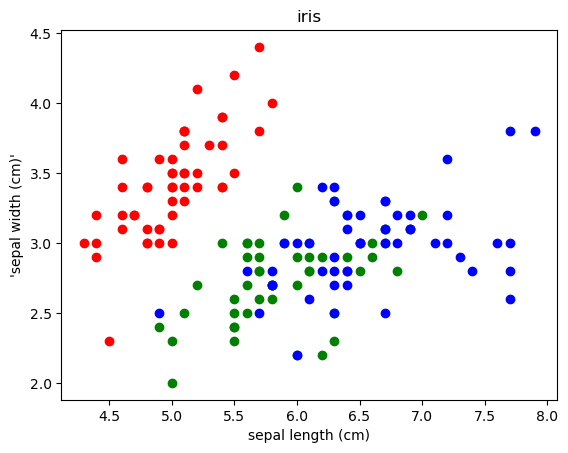

In [10]:
colors = ['r', 'g', 'b']
plt.title("iris")
for virginica, idata in grouped_data:
    # print(virginica)
    x, y = idata['sepal length (cm)'].values, idata['sepal width (cm)'].values
    plt.scatter(x, y, color=colors[int(virginica)])
plt.xlabel('sepal length (cm)')
plt.ylabel("'sepal width (cm)'")    
plt.show()

In [11]:
X = data.iloc[:, 2:4]   # 花瓣的长度和宽度

In [12]:
Y = data.iloc[:, -1]    # 种类

## 2. 模型训练

> 分出训练集和测试集

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=42)

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=8, criterion='gini')
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8)

In [15]:
y_test_hat = tree_clf.predict(X_test)

In [16]:
print('acc score:, ', accuracy_score(Y_test, y_test_hat))

acc score:,  1.0


## 3. 模型推理

In [17]:
# 对 0 类的预测效果
ys = []
for v, idata in grouped_data:
    y = tree_clf.predict(idata.iloc[:,2:4])
    ys.append(dict(Counter(y)))
print(ys)

[{0: 50}, {1: 49, 2: 1}, {2: 50}]


## 4. 绘制决策树模型 

In [18]:
iris.feature_names[2:4], iris.target_names

(['petal length (cm)', 'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

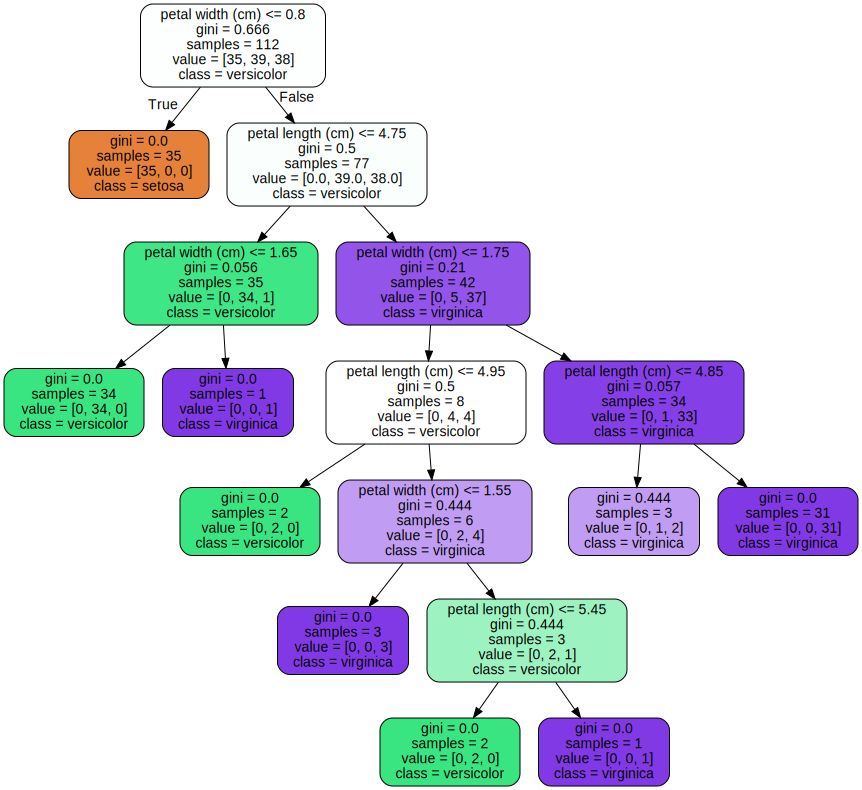

In [20]:
dot_path = './iris_decision_tree.dot'
export_graphviz(
    tree_clf,
    out_file=dot_path,
    feature_names=iris.feature_names[2:4],
    class_names=iris.target_names,
    rounded=True,   # 原边角
    filled=True # 填充颜色
)
with open(dot_path) as f:
    dot_graph = f.read()
os.remove(dot_path)
# 渲染并显示决策树
graphviz.Source(dot_graph)
